# Ejercicio de predicción utilizando datos del Titanic

En este ejercicio utilizaremos un dataset encontrado en https://www.kaggle.com/c/titanic/data. El objetivo que tenemos es predecir si una persona va a sobrevivir el Titanic utilizando aprendizaje de máquina. En este caso, utilizaremos algoritmos que ya están previamente programados en una librería llamada `sklearn`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Lo primero que tenemos que hacer es importar librerías necesarias para resolver el problema. Estas librerías las vamos a utilizar en casi todos los problemas que resolveremos.
    Ya que tenemos todo importado, es necesario leer los datos con `pandas` para poder trabajar con ellos.

In [2]:
data=pd.read_csv("./data/train.csv").set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos a limpiar todas las columnas para que sea más facil hacer el análisis. Lo más importante es que no puede haber Strings, todo tienen que ser números para poder trabajar con ellos. También eliminaremos las columnas que no tienen que ver con la supervivencia de la persona, por ejemplo su nombre.

In [3]:
data.drop(columns=['Name', 'Ticket'], inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
data['Sex']=data['Sex'].apply(lambda x: 0 if x=='male' else 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,NaN,S
2,1,1,1,38.0,1,0,71.2833,C85,C
3,1,3,1,26.0,0,0,7.9250,NaN,S
4,1,1,1,35.0,1,0,53.1000,C123,S
5,0,3,0,35.0,0,0,8.0500,NaN,S


In [5]:
data=data.fillna(0)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,S
2,1,1,1,38.0,1,0,71.2833,C85,C
3,1,3,1,26.0,0,0,7.9250,0,S
4,1,1,1,35.0,1,0,53.1000,C123,S
5,0,3,0,35.0,0,0,8.0500,0,S


In [6]:
data['Cabin']=data['Cabin'].apply(lambda x: 1 if x!=0 else 0)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,S
2,1,1,1,38.0,1,0,71.2833,1,C
3,1,3,1,26.0,0,0,7.9250,0,S
4,1,1,1,35.0,1,0,53.1000,1,S
5,0,3,0,35.0,0,0,8.0500,0,S


Es importante que en 'Embarked' no solamente usemos un número, porque el dónde abordó el pasajero no se puede medir de forma cauntitativa, por lo que se tiene que hacer un booleano por cada opción. Esto se llama `One hot encoding`.

In [7]:
data['EmbarkedS']=data['Embarked'].apply(lambda x: 1 if x=='S' else 0)
data['EmbarkedC']=data['Embarked'].apply(lambda x: 1 if x=='C' else 0)
data['EmbarkedQ']=data['Embarked'].apply(lambda x: 1 if x=='Q' else 0)
data.drop(columns='Embarked', inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,EmbarkedS,EmbarkedC,EmbarkedQ
PassengerId,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,1,0,0
2,1,1,1,38.0,1,0,71.2833,1,0,1,0
3,1,3,1,26.0,0,0,7.9250,0,1,0,0
4,1,1,1,35.0,1,0,53.1000,1,1,0,0
5,0,3,0,35.0,0,0,8.0500,0,1,0,0


Ya que tenemos nuestros datos limpios, tenemos que dividirlos en para poder entrenar al modelo en X_train y y_train.

In [8]:
X_train = data.drop(columns=['Survived','Fare'])
y_train = data['Survived']

In [9]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,EmbarkedS,EmbarkedC,EmbarkedQ
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,0,1,0,0
2,1,1,38.0,1,0,1,0,1,0
3,3,1,26.0,0,0,0,1,0,0
4,1,1,35.0,1,0,1,1,0,0
5,3,0,35.0,0,0,0,1,0,0


## Aprendizaje de máquina

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Normalmente no se tienen que utilizar tantos modelos diferentes, pero para aprender vamos a utilizar todos estos modelos y comparar algunos.

In [11]:
modelos = [('neigh',KNeighborsClassifier()),
           ('svc',SVC()),
           ('Gauss',GaussianProcessClassifier()),
           ('dTree',DecisionTreeClassifier()),
           ('forest',RandomForestClassifier()),
           ('adaBoost',AdaBoostClassifier()),
           ('gaussNB',GaussianNB()),
           ('QDA',QuadraticDiscriminantAnalysis())]

In [12]:
model_scores = {}

Para probar los modelos, vamos a utilizar algo que se llama cross validation, esto significa que el modelo entrenar un cierto número de veces con el 90% de los datos y después se va a probar en el otro 10% de los datos.
Esto va a tardar bastante tiempo en terminar de correr.

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
for modelo in modelos:
    score = abs(cross_val_score(modelo[1], X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)).mean()
    model_scores[modelo[0]]=score

Para ver qué tan bien le fue a los modelos graficaremos su error.

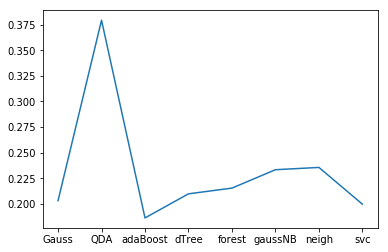

In [15]:
%matplotlib inline
lst = sorted(model_scores.items())
x, y = zip(*lst)
plt.plot(x,y)
plt.show()

Aquí podemos ver que los modelos con menor error son.
1. Random Forest
2. Decision Tree
3. Ada Boost

Podemos probar ahora a estos modelos en el dataset de pruebas, el cual tendremos que limpiar al igual que hicimos con el otro.

In [16]:
X_test = pd.read_csv('./data/test.csv').set_index('PassengerId')
X_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
X_test.drop(columns=['Name', 'Ticket','Fare'], inplace=True)
X_test=X_test.fillna(0)
X_test['Cabin']=X_test['Cabin'].apply(lambda x: 1 if x!=0 else 0)
X_test['Sex']=X_test['Sex'].apply(lambda x: 0 if x=='male' else 1)
X_test['EmbarkedS']=X_test['Embarked'].apply(lambda x: 1 if x=='S' else 0)
X_test['EmbarkedC']=X_test['Embarked'].apply(lambda x: 1 if x=='C' else 0)
X_test['EmbarkedQ']=X_test['Embarked'].apply(lambda x: 1 if x=='Q' else 0)
X_test.drop(columns='Embarked', inplace=True)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,EmbarkedS,EmbarkedC,EmbarkedQ
PassengerId,,,,,,,,,
892,3,0,34.5,0,0,0,0,0,1
893,3,1,47.0,1,0,0,1,0,0
894,2,0,62.0,0,0,0,0,0,1
895,3,0,27.0,0,0,0,1,0,0
896,3,1,22.0,1,1,0,1,0,0


In [18]:
forest = RandomForestClassifier()
dTree = DecisionTreeClassifier()
adaBoost = AdaBoostClassifier()

In [19]:
forest.fit(X_train, y_train);
dTree.fit(X_train, y_train);
adaBoost.fit(X_train, y_train);

/home/mariocespindola/PycharmProjects/CDMXSOAI/envsoai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,EmbarkedS,EmbarkedC,EmbarkedQ
PassengerId,,,,,,,,,
892,3,0,34.5,0,0,0,0,0,1
893,3,1,47.0,1,0,0,1,0,0
894,2,0,62.0,0,0,0,0,0,1
895,3,0,27.0,0,0,0,1,0,0
896,3,1,22.0,1,1,0,1,0,0


In [21]:
forest_pred = forest.predict(X_test);
dTree_pred = dTree.predict(X_test);
adaBoost_pred = adaBoost.predict(X_test);

predicciones = X_test
predicciones['forest_pred'] = forest_pred;
predicciones['dTree_pred'] = dTree_pred;
predicciones['adaBoost_pred'] = adaBoost_pred;
predicciones.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,EmbarkedS,EmbarkedC,EmbarkedQ,forest_pred,dTree_pred,adaBoost_pred
PassengerId,,,,,,,,,,,,
892,3,0,34.5,0,0,0,0,0,1,0,0,0
893,3,1,47.0,1,0,0,1,0,0,0,0,0
894,2,0,62.0,0,0,0,0,0,1,0,1,0
895,3,0,27.0,0,0,0,1,0,0,1,1,0
896,3,1,22.0,1,1,0,1,0,0,0,1,1


In [22]:
importance_features = pd.DataFrame({'Ada Boost':adaBoost.feature_importances_, 'Random Forest':forest.feature_importances_, 'Decision Tree':dTree.feature_importances_}, index=X_train.columns)

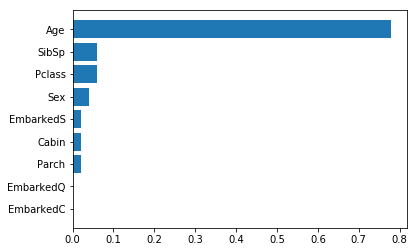

In [23]:
plt.barh(importance_features.sort_values(by='Ada Boost').index, importance_features['Ada Boost'].sort_values())
plt.show()

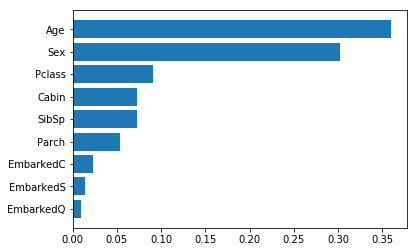

In [24]:
plt.barh(importance_features.sort_values(by='Random Forest').index, importance_features['Random Forest'].sort_values())
plt.show()

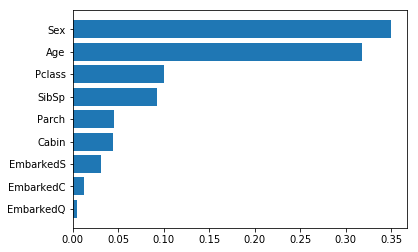

In [25]:
plt.barh(importance_features.sort_values(by='Decision Tree').index, importance_features['Decision Tree'].sort_values())
plt.show()